In [2]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

In [6]:
#Retrive WTI time series from  "Historical_series.xlsx"
#sheet WTI with daily data

xls = pd.ExcelFile("Historical_series.xlsx")
WTI = pd.read_excel(xls, "WTI", header=None).drop([0])
new_header=WTI.iloc[0]
WTI.columns=new_header
WTI=WTI[1:]
WTI=WTI.reset_index(drop=True)
WTI = WTI.loc[:, WTI.columns.notna()]
WTI = WTI.T.drop_duplicates().T
WTI = WTI.iloc[:,0:4]
WTI.columns = ['Date', 'AdjClose', 'avg10', 'avg50']

In [15]:
#Download WTI daily data from yahoo database

ticker = 'CL=F'
period1 = int(time.mktime(datetime.datetime(2000, 8, 23, 23, 59).timetuple())) #year,month,day,hour,minute
period2 = int(time.mktime(datetime.datetime(2022, 2, 11, 23, 59).timetuple()))
interval = '1d' # 1d, 1m, 1wk

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

wtiy = pd.read_csv(query_string)

In [16]:
#Clean wtly dataset

wtiy = wtiy.dropna()
wtiy['Date'] = pd.to_datetime(wtiy['Date'])

In [17]:
#merging the two dataset

WTI_final = pd.merge(WTI,wtiy,on='Date')

In [20]:
#Cleaning of WTi_final

WTI_final = WTI_final.drop(WTI_final.columns[8],axis=1)
WTI_final = WTI_final.set_index('Date')

In [22]:
#Adding avarage mean 7,100,200,253 days
WTI_final["avg7"] = WTI_final["AdjClose"].rolling(window =7).mean()
WTI_final["avg100"] = WTI_final["AdjClose"].rolling(window =100).mean()
WTI_final["avg200"] = WTI_final["AdjClose"].rolling(window =200).mean()
WTI_final["avg253"] = WTI_final["AdjClose"].rolling(window =253).mean()

In [24]:
#adding SPD_OPEN/CLOSE, SPD_HIGH/LOW and %price variation on gold commodity
WTI_final["SPD_OPEN/CLOSE"] = (WTI_final['Close'] - WTI_final['Open'])

WTI_final['SPD_HIGH/LOW'] = (WTI_final['High']-WTI_final['Low'])


WTI_final['prevAdjClose'] = WTI_final.AdjClose.shift(1)
WTI_final['%varAdjClose'] = ((WTI_final['AdjClose'] / WTI_final['prevAdjClose'])-1)*100

In [26]:
#Positive and negative counting

pos_count_WTI, neg_count_WTI = 0,0

for num in WTI_final['%varAdjClose']:
    if num >= 0:
        pos_count_WTI += 1
    else:
        neg_count_WTI += 1

print(f"Positive closing gold: {pos_count_WTI}")
print(f"Negative closing gold: {neg_count_WTI}")

Positive closing gold: 2833
Negative closing gold: 2559


In [27]:
#AdjClose to binary

positive_string_WTI = []

for i in WTI_final['%varAdjClose']:
    if i > 0:
        positive_string_WTI.append(1)
    else:
        positive_string_WTI.append(0)

WTI_final['pos_string'] = positive_string_WTI

In [29]:
WTI_final = WTI_final.fillna(0)

In [30]:
WTI_final = WTI_final[['AdjClose','Open','High','Low','Close','Volume','avg7','avg10','avg50','avg100','avg200','avg253','SPD_OPEN/CLOSE','SPD_HIGH/LOW', 'prevAdjClose','%varAdjClose','pos_string']]

In [31]:
WTI_final

,AdjClose,Open,High,Low,Close,Volume,avg7,avg10,avg50,avg100,avg200,avg253,SPD_OPEN/CLOSE,SPD_HIGH/LOW,prevAdjClose,%varAdjClose,pos_string
Date,,,,,,,,,,,,,,,,,
2000-08-23,32.049999,31.950001,32.799999,31.950001,32.049999,79385.0,0.000000,0.000000,0.0000,0.0000,0.00000,0.000000,0.099998,0.849998,0.000000,0.000000,0
2000-08-24,31.629999,31.900000,32.240002,31.400000,31.629999,72978.0,0.000000,0.000000,0.0000,0.0000,0.00000,0.000000,-0.270001,0.840002,32.049999,-1.310453,0
2000-08-25,32.049999,31.700001,32.099998,31.320000,32.049999,44601.0,0.000000,0.000000,0.0000,0.0000,0.00000,0.000000,0.349998,0.779998,31.629999,1.327854,1
2000-08-28,32.869999,32.040001,32.919998,31.860001,32.869999,46770.0,0.000000,0.000000,0.0000,0.0000,0.00000,0.000000,0.829998,1.059997,32.049999,2.558501,1
2000-08-29,32.720001,32.820000,33.029999,32.560001,32.720001,49131.0,0.000000,0.000000,0.0000,0.0000,0.00000,0.000000,-0.099999,0.469998,32.869999,-0.456336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-07,91.320000,91.820000,92.730003,90.730003,91.320000,497754.0,89.332856,88.488999,77.8280,78.5549,73.81990,71.247826,-0.500000,2.000000,92.309998,-1.072471,0
2022-02-08,89.360001,91.639999,91.680000,88.510002,89.360001,467386.0,89.695714,88.864999,78.2522,78.7288,73.95200,71.370356,-2.279998,3.169998,91.320000,-2.146298,0
2022-02-09,89.660004,89.860001,90.580002,88.410004,89.660004,445618.0,89.911428,89.096000,78.6464,78.9225,74.08100,71.492807,-0.199997,2.169998,89.360001,0.335724,1


## **Graphing the recessions periods**

In [34]:
# read in data
rec_data = pd.read_csv("USREC.csv") # download the US recession periods from FRED.com

In [35]:
WTI_rec = WTI_final.iloc[:,0]
WTI_rec = pd.DataFrame(data=WTI_rec)
WTI_rec.reset_index(level=0, inplace=True)

In [36]:
rec_data['DATE'] = pd.to_datetime(rec_data['DATE'])

In [37]:
#enlarging data for data visualization
rec_data["USREC"] = np.where(rec_data['USREC']==1, 150 , 0) 

In [38]:
#resampling recession data to daily to keep it uniform with stock data
dy = rec_data.set_index('DATE').resample('D').ffill().reset_index()

(10592.0, 18993.0)

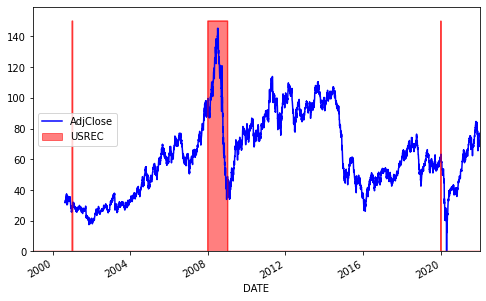

In [40]:
fig, ax = plt.subplots()
WTI_rec.plot.line(ax=ax, figsize=(8, 5), x='Date', color="blue")
dy.plot.area(ax=ax, figsize=(8, 5), x='DATE', alpha=0.5, color="red")
plt.xlim("1999-01-01", "2022-01-01")